In [4]:
import os

def check_dx_field(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                dx_field = line.strip().split(':')[1].strip()
                if not dx_field:
                    return True
    return False

folder_path = '/home/vinayaka/physionet/records100_images'  # Replace with the path to your folder

for filename in os.listdir(folder_path):
    if filename.endswith('.hea'):
        file_path = os.path.join(folder_path, filename)
        if check_dx_field(file_path):
            print(filename)

In [7]:
import os
import csv

def check_dx_field(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                dx_field = line.strip().split(':')[1].strip()
                if not dx_field:
                    return True
    return False

def get_scp_codes(filename, csv_file):
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['filename_lr'].split('/')[-1].split('.')[0] == filename:
                return row['scp_codes']
    return None

def process_hea_files(folder_path, csv_file_path):
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith('.hea'):
                file_path = os.path.join(root, filename)
                if check_dx_field(file_path):
                    filename_without_ext = os.path.splitext(filename)[0]
                    scp_codes = get_scp_codes(filename_without_ext, csv_file_path)
                    if scp_codes:
                        print(f"Filename: {filename_without_ext}, SCP Codes: {scp_codes}")
                    else:
                        print(f"Filename: {filename_without_ext}, SCP Codes: Not found")

folder_path = '/home/vinayaka/physionet/records100_images'  # Replace with the path to your main folder
csv_file_path = '/home/vinayaka/physionet/python-example-2024/physionet.org/files/ptb-xl/1.0.3/ptbxl_database.csv'  # Replace with the path to the ptbxl_database.csv file

process_hea_files(folder_path, csv_file_path)

Filename: 01596_lr, SCP Codes: {'PACE': 100.0, 'STE_': 0.0}
Filename: 01908_lr, SCP Codes: {'PACE': 100.0, 'PAC': 0.0, 'STD_': 0.0}
Filename: 01773_lr, SCP Codes: {'AFLT': 100.0}
Filename: 01717_lr, SCP Codes: {'PACE': 100.0, 'SBRAD': 0.0}
Filename: 01399_lr, SCP Codes: {'PACE': 100.0}
Filename: 01461_lr, SCP Codes: {'PACE': 100.0}
Filename: 01641_lr, SCP Codes: {'PACE': 100.0}
Filename: 01299_lr, SCP Codes: {'PSVT': 100.0}
Filename: 01674_lr, SCP Codes: {'PACE': 100.0}
Filename: 01173_lr, SCP Codes: {'AFLT': 100.0, 'SVTAC': 0.0}
Filename: 00020_lr, SCP Codes: {'AFLT': 100.0, 'ABQRS': 0.0}
Filename: 00449_lr, SCP Codes: {'AFLT': 100.0}
Filename: 00190_lr, SCP Codes: {'PACE': 100.0}
Filename: 00018_lr, SCP Codes: {'AFLT': 100.0}
Filename: 00858_lr, SCP Codes: {'AFLT': 100.0}
Filename: 00382_lr, SCP Codes: {'PACE': 100.0}
Filename: 00034_lr, SCP Codes: {'AFLT': 100.0}
Filename: 00385_lr, SCP Codes: {'PACE': 100.0}
Filename: 00498_lr, SCP Codes: {'PACE': 100.0}
Filename: 00023_lr, SCP Cod

In [3]:
import os
import csv

def check_dx_field(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                dx_field = line.strip().split(':')[1].strip()
                if not dx_field:
                    return True
    return False

def get_scp_codes(filename, csv_file):
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['filename_lr'].split('/')[-1].split('.')[0] == filename:
                return eval(row['scp_codes'])
    return None

def get_classes_for_scp_codes(scp_codes, patient_data_file):
    classes = set()
    with open(patient_data_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['Finding'] in scp_codes and float(scp_codes[row['Finding']]) > 0.0:
                classes.add(row['Class'])
    return list(classes)

folder_path = '/home/vinayaka/physionet/sample_train_data'   # Replace with the path to your folder
csv_file_path = '/home/vinayaka/physionet/python-example-2024/physionet.org/files/ptb-xl/1.0.3/ptbxl_database.csv'  # Replace with the path to the ptbxl_database.csv file
patient_data_file = '/home/vinayaka/physionet/patient_data.csv'  # Replace with the path to the patient_data.csv file

for filename in os.listdir(folder_path):
    if filename.endswith('.hea'):
        file_path = os.path.join(folder_path, filename)
        if check_dx_field(file_path):
            filename_without_ext = os.path.splitext(filename)[0]
            scp_codes = get_scp_codes(filename_without_ext, csv_file_path)
            if scp_codes:
                classes = get_classes_for_scp_codes(scp_codes, patient_data_file)
                print(f"Filename: {filename_without_ext}, SCP Codes: {scp_codes}, Class(es): {', '.join(classes)}")
            else:
                print(f"Filename: {filename_without_ext}, SCP Codes: Not found")

Filename: 00020_lr, SCP Codes: {'AFLT': 100.0, 'ABQRS': 0.0}, Class(es): CD
Filename: 00018_lr, SCP Codes: {'AFLT': 100.0}, Class(es): CD
Filename: 00034_lr, SCP Codes: {'AFLT': 100.0}, Class(es): CD
Filename: 00023_lr, SCP Codes: {'AFLT': 100.0}, Class(es): CD
Filename: 00017_lr, SCP Codes: {'AFLT': 100.0, 'ABQRS': 0.0, 'AFIB': 0.0}, Class(es): CD


In [1]:
import os
import csv

# Function to check if the '#Dx:' field is empty in a .hea file
def check_dx_field(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                dx_field = line.strip().split(':')[1].strip()
                if not dx_field:
                    return True
    return False

# Function to retrieve SCP codes from the ptbxl_database.csv file based on the filename
def get_scp_codes(filename, csv_file):
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['filename_lr'].split('/')[-1].split('.')[0] == filename:
                return eval(row['scp_codes'])
    return None

# Function to retrieve classes based on SCP codes from the patient_data.csv file
def get_classes_for_scp_codes(scp_codes, patient_data_file):
    classes = set()
    with open(patient_data_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['Finding'] in scp_codes and float(scp_codes[row['Finding']]) > 0.0:
                classes.add(row['Class'])
    return list(classes)

# Function to update the '#Dx:' field in a .hea file with the retrieved classes
def update_dx_field(file_path, classes):
    content = ""
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                line = f"#Dx: {', '.join(classes)}\n"
            content += line
    with open(file_path, 'w') as file:
        file.write(content)

# Function to process .hea files in a folder and its subfolders
def process_hea_files(folder_path, csv_file_path, patient_data_file):
    updated_files = []
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith('.hea'):
                file_path = os.path.join(root, filename)
                if check_dx_field(file_path):
                    filename_without_ext = os.path.splitext(filename)[0]
                    scp_codes = get_scp_codes(filename_without_ext, csv_file_path)
                    if scp_codes:
                        classes = get_classes_for_scp_codes(scp_codes, patient_data_file)
                        update_dx_field(file_path, classes)
                        updated_files.append(file_path)
                        print(f"Updated {file_path} with #Dx: {', '.join(classes)}")
                    else:
                        print(f"SCP codes not found for {filename}")
    return updated_files

# Replace with the appropriate paths for your folder, ptbxl_database.csv file, and patient_data.csv file
folder_path = '/home/vinayaka/physionet/records100_images/Test'
csv_file_path = '/home/vinayaka/physionet/python-example-2024/physionet.org/files/ptb-xl/1.0.3/ptbxl_database.csv'
patient_data_file = '/home/vinayaka/physionet/patient_data.csv'

# Process .hea files and retrieve the list of updated files
updated_files = process_hea_files(folder_path, csv_file_path, patient_data_file)

# Uncomment the following lines to print the list of updated files
# print("\nUpdated files:")
# for file in updated_files:
#     print(file)

Updated /home/vinayaka/physionet/records100_images/Test/02000/02486_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02430_lr.hea with #Dx: CD
Updated /home/vinayaka/physionet/records100_images/Test/02000/02587_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02885_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02739_lr.hea with #Dx: CD
Updated /home/vinayaka/physionet/records100_images/Test/02000/02592_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02090_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02051_lr.hea with #Dx: CD
Updated /home/vinayaka/physionet/records100_images/Test/02000/02205_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02218_lr.hea with #Dx: NORM
Updated /home/vinayaka/physionet/records100_images/Test/02000/02828_lr.hea with #Dx: NORM
Updated /home/vi

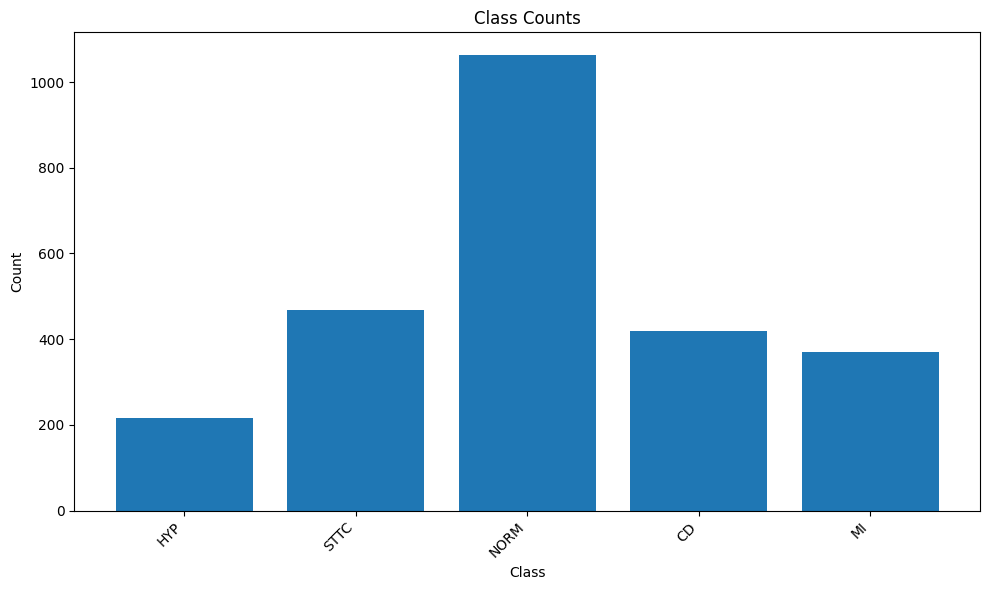

In [11]:
import os
import matplotlib.pyplot as plt

def count_classes(folder_path):
    """
    Count the number of classes present in the .hea files within the specified folder and its subfolders.
    
    Args:
        folder_path (str): Path to the folder containing .hea files.
        
    Returns:
        dict: Dictionary where keys are class names and values are their counts.
    """
    class_counts = {}
    
    # Iterate through all files in the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith('.hea'):
                file_path = os.path.join(root, filename)
                
                # Read the content of the .hea file
                with open(file_path, 'r') as file:
                    content = file.read()
                
                # Find the line starting with '#Dx:' and extract the classes
                for line in content.split('\n'):
                    if line.startswith('#Dx:'):
                        classes = [class_name.strip() for class_name in line.split(':')[1].split(',')]
                        
                        # Update the class counts dictionary
                        for class_name in classes:
                            if class_name:
                                class_counts[class_name] = class_counts.get(class_name, 0) + 1
    
    return class_counts

def plot_class_counts(class_counts):
    """
    Plot a bar chart of class counts.
    
    Args:
        class_counts (dict): Dictionary where keys are class names and values are their counts.
    """
    # Extract class names and counts from the dictionary
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Replace with the appropriate path to your folder containing .hea files
folder_path = '/home/vinayaka/physionet/records100_images/Train'

# Count the classes in the .hea files
class_counts = count_classes(folder_path)

# Plot the class counts as a bar chart
plot_class_counts(class_counts)

In [ ]:
import os
import csv

def check_dx_field(file_path):
    """
    Check if the #Dx: field in a .hea file is empty.
    
    Args:
        file_path (str): The path to the .hea file.
        
    Returns:
        bool: True if the #Dx: field is empty, False otherwise.
    """
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                dx_field = line.strip().split(':')[1].strip()
                if not dx_field:
                    return True
    return False

def get_scp_codes(filename, csv_file):
    """
    Get the SCP codes for a given filename from the ptbxl_database.csv file.
    
    Args:
        filename (str): The filename without extension.
        csv_file (str): The path to the ptbxl_database.csv file.
        
    Returns:
        dict: The SCP codes as a dictionary, or None if not found.
    """
    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['filename_lr'].split('/')[-1].split('.')[0] == filename:
                return eval(row['scp_codes'])
    return None

def get_classes_for_scp_codes(scp_codes, patient_data_file):
    """
    Get the classes corresponding to the SCP codes from the patient_data.csv file.
    
    Args:
        scp_codes (dict): The SCP codes as a dictionary.
        patient_data_file (str): The path to the patient_data.csv file.
        
    Returns:
        list: The list of classes corresponding to the SCP codes.
    """
    classes = set()
    with open(patient_data_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            if row['Finding'] in scp_codes and float(scp_codes[row['Finding']]) > 0.0:
                classes.add(row['Class'])
    return list(classes)

def update_dx_field(file_path, classes):
    """
    Update the #Dx: field in a .hea file with the given classes.
    
    Args:
        file_path (str): The path to the .hea file.
        classes (list): The list of classes to be written in the #Dx: field.
    """
    content = ""
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#Dx:'):
                line = f"#Dx: {', '.join(classes)}\n"
            content += line
    with open(file_path, 'w') as file:
        file.write(content)

# Set the paths to the required files and folders
folder_path = '/path/to/your/folder'  # Replace with the path to your folder
csv_file_path = '/path/to/ptbxl_database.csv'  # Replace with the path to the ptbxl_database.csv file
patient_data_file = '/path/to/patient_data.csv'  # Replace with the path to the patient_data.csv file

# List to store the updated filenames
updated_files = []

# Iterate over the files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.hea'):
        file_path = os.path.join(folder_path, filename)
        if check_dx_field(file_path):
            filename_without_ext = os.path.splitext(filename)[0]
            scp_codes = get_scp_codes(filename_without_ext, csv_file_path)
            if scp_codes:
                classes = get_classes_for_scp_codes(scp_codes, patient_data_file)
                update_dx_field(file_path, classes)
                updated_files.append(filename)
                print(f"Updated {filename} with #Dx: {', '.join(classes)}")
            else:
                print(f"SCP codes not found for {filename}")